In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random as rd 

In [4]:
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [5]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [8]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  714  716  688  680  690  213  239  237  243  225
gene2   51   42   27   36   32   65   61   54   49   46
gene3  493  486  440  444  494  258  282  304  254  260
gene4  142  145  167  160  169  938  972  958  909  945
gene5  676  703  717  681  703  323  348  309  314  329
(100, 10)


In [9]:
scaled_data = StandardScaler().fit_transform(data.T)

In [12]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [14]:
##Scree plot with no of PCs
percents = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(percents)+1)]

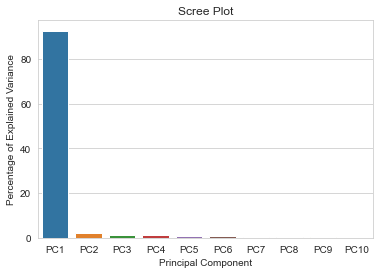

In [18]:
##Plot using seaborn 
import seaborn as sns
sns.set_style('whitegrid')
sns.barplot(x=labels, y=percents)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Scree plot shows that max no of components is represented by the first component followed by the PC2. So, we can use PC1 and PC2 to represent the data.

In [19]:
#putting the pca values into a dataframe
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

In [20]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.741736,-0.434995,2.759324,-0.609246,-0.932132,-0.328090,-0.217295,-0.371817,0.329634,4.947129e-16
wt2,9.385262,2.523169,0.198703,0.391170,1.192303,1.048223,0.486078,0.212262,0.513645,-4.999108e-16
wt3,9.520513,0.489178,-1.621392,0.734144,-1.083739,0.599490,-0.807870,-0.896614,-0.330876,1.244942e-15
wt4,9.919717,-2.399391,-0.170635,0.620061,0.759704,-0.012808,-0.712592,1.140975,-0.226268,-5.648047e-16
wt5,9.535373,-0.109530,-1.184079,-1.133660,0.090432,-1.301523,1.265773,-0.117853,-0.285802,-3.484081e-16


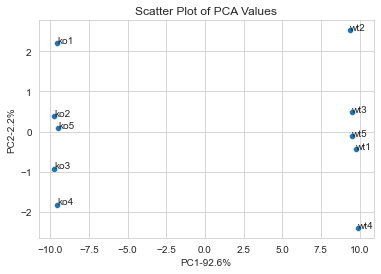

In [27]:
##scatter plot of the PCA values
sns.set_style('whitegrid')
sns.scatterplot(x=labels[0], y=labels[1], data=pca_df)
plt.xlabel(f'PC1-{percents[0]}%')
plt.ylabel(f'PC2-{percents[1]}%')
plt.title('Scatter Plot of PCA Values')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.loc[sample, labels[0]], pca_df.loc[sample, labels[1]]))
plt.show()

In [39]:
#loading scores of the PCA components
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_scores[:10].index.values

print(loading_scores[top_10_genes])

gene30     0.103888
gene74    -0.103875
gene92    -0.103863
gene4     -0.103845
gene98     0.103798
gene100    0.103785
gene75     0.103781
gene72    -0.103770
gene7     -0.103761
gene38     0.103732
dtype: float64
